In [4]:
#MULTIPLE REGRESSION PROJECT
#Section One: Import our Libraries
#Credit goes to 

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [19]:
#Section Two: Load the Data into Pandas
# load the data and replace the '..' with nan
path = r"D:\OneDrive\Documents\Python Scripts\korea_data.xlsx"
econ_df = pd.read_excel(path)
econ_df = econ_df.replace('..','nan')

#set the index to the year column
econ_df = econ_df.set_index('Year')

#set data type and select rows up to 2016
econ_df = econ_df.astype(float)
econ_df = econ_df.loc['1969':'2016']

column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}

#rename the columns
econ_df = econ_df.rename(columns = column_names)

#check for nulls
display('-'*100)
display(econ_df.isnull().any())

#display first 5 rows
display('-'*100)
display(econ_df.head())


'----------------------------------------------------------------------------------------------------'

gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


<AxesSubplot:>

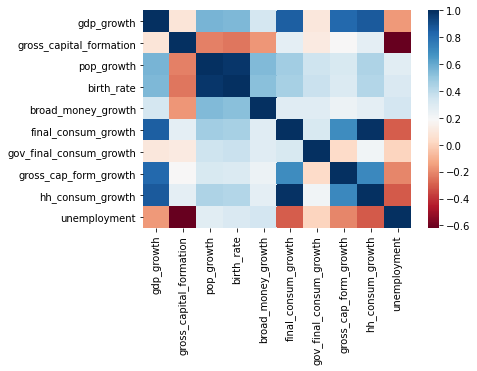

In [21]:
#Section Three: Check for Perfect Multicollinearity
#calculate the correlation matrix
corr = econ_df.corr()
display(corr)

#plot the correlation heatmap
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'RdBu')

In [24]:
#define two data frames, before and after drop
econ_df_before = econ_df
econ_df_after = econ_df.drop(['gdp_growth','birth_rate','final_consum_growth','gross_capital_formation'], axis = 1)

#VFI expects a constant term in data. Must add using add_constant method
X1 = sm.tools.add_constant(econ_df_before)
X2 = sm.tools.add_constant(econ_df_after)

#Create the series
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

#display the series
print('Data Before')
print('-'*100)
display(series_before)

#display the series
print('Data Before')
print('-'*100)
display(series_after)


Data Before
----------------------------------------------------------------------------------------------------


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

Data Before
----------------------------------------------------------------------------------------------------


const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

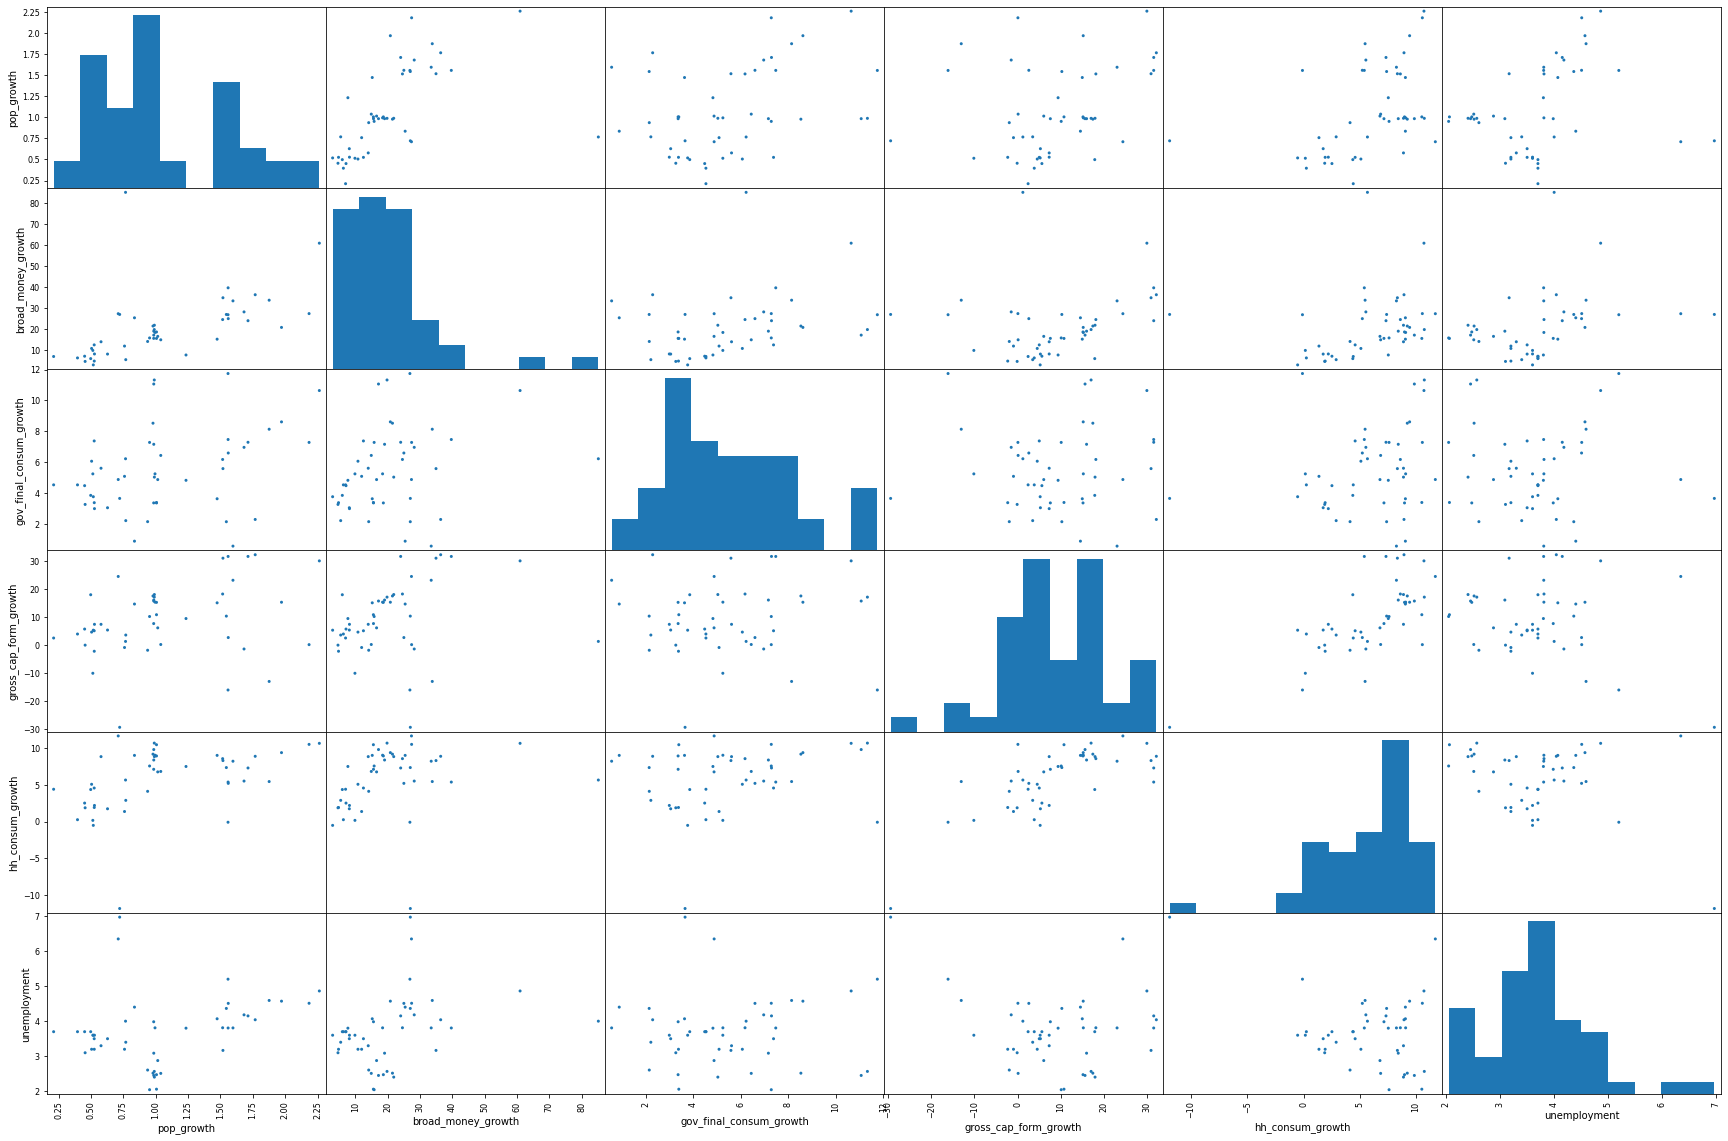

In [27]:
#Another way to visualize multicollinearity
#define the plot
pd.plotting.scatter_matrix(econ_df_after, alpha = 1, figsize = (30, 20))

#show the plot
plt.show()

In [30]:
#Section Four: Describe the Data Set
#describe the date (summary)
desc_df = econ_df.describe()

#add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] *3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] *3)
desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_std,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_std,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [32]:
#filter the dataframe to remove values that exceed 3 standard deviations
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis = 1)]

#Which rows were removed?
econ_df.index.difference(econ_remove_df.index)

#These were real finnancial crisis. We will keep these data points. 

Int64Index([1998, 2001], dtype='int64', name='Year')

In [36]:
#Section Five: Build the Model using sklearn library
#define response and explanetory variables
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth','gross_capital_formation'], axis = 1)

X = econ_df_after.drop('gdp_growth', axis = 1)
Y = econ_df_after[['gdp_growth']]

#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

#create a linear regression model
regression_model = LinearRegression()

#pass through the X_train and y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

In [37]:
#Exploring the Output
intercept = regression_model.intercept_[0]
coef = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

#Loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 2.08
----------------------------------------------------------------------------------------------------
The Coefficient for pop_growth is 2.0
The Coefficient for broad_money_growth is -0.0017
The Coefficient for gov_final_consum_growth is -0.21
The Coefficient for gross_cap_form_growth is 0.14
The Coefficient for hh_consum_growth is 0.51
The Coefficient for unemployment is 0.027


In [38]:
#Get multiple predictions
y_predict = regression_model.predict(X_test)

#show theh first 5
y_predict[:5]

array([[ 7.61317534],
       [ 6.31344066],
       [ 5.06818662],
       [ 4.19869856],
       [11.11885324]])

In [39]:
#Section Six: Evaluating the Model Using the Statsmodel
#redefine our input
X2 = sm.add_constant(X)

#create ols model
model = sm.OLS(Y, X2)

#fit the data
est = model.fit()

In [47]:
#Checking for Heteroscedasticity
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

#print the results of the test
if pval < .05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypothesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypothesis, so there is heterosecdasticity.")


0.2518364670120292 0.26627945578541473
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.2518
We reject the null hypothesis, so there is heterosecdasticity.


Thhe number of lags will be 9
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.1596
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


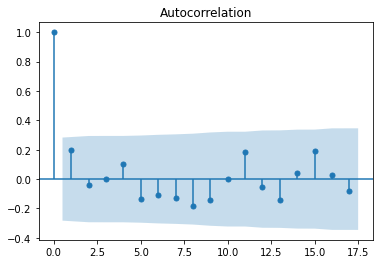

In [49]:
#Checking for Autocorrelation
#test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

#calculate the lag
lag = min(10, (len(X)//5))
print('Thhe number of lags will be {}'.format(lag))
print('-'*100)

#run the Ljung-Box test for no autocorrelation residuals
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

#grab the p-values and the test stat
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)
    
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

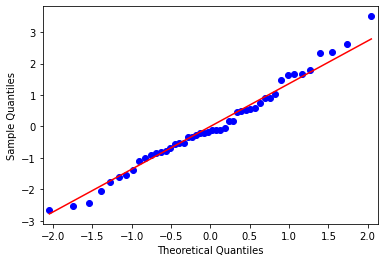

The mean of the residuals is -4.82e-15


In [51]:
#Checking For Normally Distributed Residuals
import pylab

#check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

#Also check the mean of the residuals is approx. 0
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))